# Exp 5 - 3 - Remove 100 features

### Import packages

In [1]:
import itertools
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from utilities import cal_score, convert_types

### Columns

In [2]:
cols_num = ['txn_dt', 'total_floor', 'building_complete_dt', 'parking_area', 'parking_price', 'txn_floor', 'land_area', 'building_area', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_100', 'I_250', 'I_500', 'I_1000', 'I_5000', 'I_10000', 'I_MIN', 'II_10', 'II_50', 'II_100', 'II_250', 'II_500', 'II_1000', 'II_5000', 'II_10000', 'II_MIN', 'III_10', 'III_50', 'III_100', 'III_250', 'III_500', 'III_1000', 'III_5000', 'III_10000', 'III_MIN', 'IV_10', 'IV_50', 'IV_100', 'IV_250', 'IV_500', 'IV_1000', 'IV_5000', 'IV_10000', 'IV_MIN', 'V_10', 'V_50', 'V_100', 'V_250', 'V_500', 'V_1000', 'V_5000', 'V_10000', 'V_MIN', 'VI_50', 'VI_100', 'VI_250', 'VI_500', 'VI_1000', 'VI_5000', 'VI_10000', 'VI_MIN', 'VII_10', 'VII_50', 'VII_100', 'VII_250', 'VII_500', 'VII_1000', 'VII_5000', 'VII_10000', 'VII_MIN', 'VIII_10', 'VIII_50', 'VIII_100', 'VIII_250', 'VIII_500', 'VIII_1000', 'VIII_5000', 'VIII_10000', 'VIII_MIN', 'IX_10', 'IX_50', 'IX_100', 'IX_250', 'IX_500', 'IX_1000', 'IX_5000', 'IX_10000', 'IX_MIN', 'X_10', 'X_50', 'X_100', 'X_250', 'X_500', 'X_1000', 'X_5000', 'X_10000', 'X_MIN', 'XI_10', 'XI_50', 'XI_100', 'XI_250', 'XI_500', 'XI_1000', 'XI_5000', 'XI_10000', 'XI_MIN', 'XII_10', 'XII_50', 'XII_100', 'XII_250', 'XII_500', 'XII_1000', 'XII_5000', 'XII_10000', 'XII_MIN', 'XIII_10', 'XIII_50', 'XIII_100', 'XIII_250', 'XIII_500', 'XIII_1000', 'XIII_5000', 'XIII_10000', 'XIII_MIN', 'XIV_10', 'XIV_50', 'XIV_100', 'XIV_250', 'XIV_500', 'XIV_1000', 'XIV_5000', 'XIV_10000', 'XIV_MIN']
cols_cat = ['building_material', 'city', 'building_type', 'building_use', 'parking_way', 'town', 'village']
cols_bin = ['I_index_50', 'I_index_500', 'I_index_1000', 'II_index_50', 'II_index_500', 'II_index_1000', 'III_index_50', 'III_index_500', 'III_index_1000', 'IV_index_50', 'IV_index_500', 'IV_index_1000', 'IV_index_5000', 'V_index_50', 'V_index_500', 'V_index_1000', 'VI_10', 'VI_index_50', 'VI_index_500', 'VI_index_1000', 'VII_index_50', 'VII_index_500', 'VII_index_1000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_1000', 'IX_index_50', 'IX_index_500', 'IX_index_1000', 'IX_index_5000', 'X_index_50', 'X_index_500', 'X_index_1000', 'XI_index_50', 'XI_index_500', 'XI_index_1000', 'XI_index_5000', 'XI_index_10000', 'XII_index_50', 'XII_index_500', 'XII_index_1000', 'XIII_index_50', 'XIII_index_500', 'XIII_index_1000', 'XIII_index_5000', 'XIII_index_10000', 'XIV_index_50', 'XIV_index_500', 'XIV_index_1000']
cols_feats = cols_num + cols_cat + cols_bin

col_target = 'total_price'
col_target_log1p = 'target'

#### Remove columns

In [3]:
feat_rm = ['XIII_index_500', 'VI_500', 'IX_index_50', 'I_50', 'III_index_50', 'XIV_100', 'X_50', 'VI_index_500', 'VIII_index_50', 'XI_index_1000', 'XIII_250', 'N_500', 'XIII_index_50', 'I_index_1000', 'I_10', 'IV_index_1000', 'VIII_index_1000', 'IX_index_1000', 'I_index_50', 'XIII_10', 'X_index_50', 'IX_50', 'VI_10', 'IX_index_5000', 'XI_index_10000', 'XII_index_1000', 'XIV_index_1000', 'IV_index_5000', 'II_index_1000', 'VII_index_1000', 'XI_index_5000', 'XIII_index_5000', 'II_index_500', 'X_100', 'IX_100', 'XII_index_50', 'XIV_index_500', 'IV_index_50', 'XII_index_500', 'VI_index_50', 'N_5000', 'XIII_100', 'IX_10', 'XIII_index_10000', 'II_index_50', 'XI_index_500', 'V_index_1000', 'VII_index_50', 'VIII_50', 'XIV_10', 'X_10', 'XI_10', 'VI_50', 'III_index_1000', 'XIII_index_1000', 'II_10', 'V_index_500', 'I_100', 'IV_index_500', 'VIII_index_500', 'X_index_500', 'VI_1000', 'VI_index_1000', 'VII_index_500', 'XIV_index_50', 'III_index_500', 'IV_10', 'V_index_50', 'XI_50', 'III_10', 'VII_10', 'XIII_500', 'XIII_50', 'XI_index_50', 'I_index_500', 'XI_100', 'V_10', 'N_10000', 'XII_10', 'I_1000', 'X_index_1000', 'IV_50', 'IV_100', 'VI_100', 'IX_index_500', 'VI_250', 'V_100', 'divorce_rate', 'II_50', 'junior_rate', 'V_50', 'VIII_10', 'II_250', 'XII_50', 'III_100', 'I_250', 'N_1000', 'IV_250', 'XI_500', 'XIV_50']
print('N of features removed', len(feat_rm))
cols_num = [c for c in cols_num if c not in feat_rm]
cols_cat = [c for c in cols_cat if c not in feat_rm]
cols_bin = [c for c in cols_bin if c not in feat_rm]
cols_feats = cols_num + cols_cat + cols_bin
print('N remaining features:', len(cols_feats))

N of features removed 100
N remaining features: 111


### Read data

In [4]:
df = pd.read_csv('dataset/train.csv', dtype=object)

In [5]:
df.columns

Index(['building_id', 'building_material', 'city', 'txn_dt', 'total_floor',
       'building_type', 'building_use', 'building_complete_dt', 'parking_way',
       'parking_area',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=235)

### Preprocessing

In [6]:
# Convert types
df = convert_types(df, cols_num, col_target=col_target)

# Generate feats (train-test-same feats)
#create_feats(df)

### Target transform

In [7]:
def target_transform(df):  # Add new columns inplace!!
    '''Transform the original target to the target for model to train on'''
    df['log_total_price'] = np.log1p(df['total_price'])
    return df

def target_inverse_transform(df, y_pred):
    '''Inverse transorform the model target to the original target of our problem'''
    y_pred_expm1 = np.expm1(y_pred)
    y_pred_final = np.clip(y_pred_expm1, 0, None)
    return y_pred_final            

In [8]:
df = target_transform(df)

In [9]:
# transformed target fit by the model
col_model_target = 'log_total_price'
#col_model_target = 'total_price'

### Feat engineering

In [10]:
from feature_engineering import CategoricalColumnsEncoder

In [11]:
class FeatureEngineering():
    def __init__(self):
        pass
    
    def fit_transform(self, df, cols_cat, cols_bin):
        df = df.copy()
        # Denote categorical-type
        self.cat_encoder = CategoricalColumnsEncoder(mode='pandas')
        self.cat_encoder.fit_transform(df, cols_cat+cols_bin)
        return df
    
    def transform(self, df):
        df = df.copy()
        self.cat_encoder.transform(df)
        return df

### Grid search

In [12]:
# grid search
params_fix = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'mse',
              'metric': 'mape',
              'learning_rate': 0.015,
              }
lgb_other_params = {'num_boost_round': 10000,
                    'verbose_eval': 2000,
                    'early_stopping_rounds': 1000,
                   }

#### Round 1

In [13]:
%%time
params_gsearch1 = {'num_leaves': [63, 255, 511],           # may reduce in dim-reduction exp
                   'feature_fraction': [0.5, 0.75, 1.0],
                   'min_data_in_leaf': [5, 20, 50]
                   }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)

    # Construct lgb dataset
    lgb_train = lgb.Dataset(df_train[cols_feats], df_train[col_model_target]).construct()
    lgb_val = lgb.Dataset(df_val[cols_feats], df_val[col_model_target], reference=lgb_train).construct()
        
    # grid search
    for values in itertools.product(*[params_gsearch1[key] for key in params_gsearch1]):
        params = params_fix.copy()
        params.update( dict(zip(params_gsearch1.keys(), values)) )
        print('params:', params)

        model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

        y_pred = model.predict(df_val[cols_feats])
        
        y_pred_final = target_inverse_transform(df_val, y_pred)
            
        score = cal_score(df_val['total_price'], y_pred_final)
        print(score)
        tuple_params = tuple(params.items())
        gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results1 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results1.sort(key= lambda x: x[1], reverse=True)

==== Fold 1 ====
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 0.5, 'min_data_in_leaf': 5}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00924131
[4000]	valid_0's mape: 0.00888073
[6000]	valid_0's mape: 0.00871686
[8000]	valid_0's mape: 0.00863162
[10000]	valid_0's mape: 0.00858314
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00858314
5400.862883775688
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 0.5, 'min_data_in_leaf': 20}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00920799
[4000]	valid_0's mape: 0.00885266
[6000]	valid_0's mape: 0.00870758
[8000]	valid_0's mape: 0.00863049
[10000]	valid_0's mape: 0.00858631
Did not meet early stopping. Best iteration is:
[9994

5478.858764342988
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 1.0, 'min_data_in_leaf': 20}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00894786
[4000]	valid_0's mape: 0.0088456
[6000]	valid_0's mape: 0.00882367
[8000]	valid_0's mape: 0.00881642
[10000]	valid_0's mape: 0.00881274
Did not meet early stopping. Best iteration is:
[9997]	valid_0's mape: 0.00881273
5442.8586171777915
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 1.0, 'min_data_in_leaf': 50}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00898248
[4000]	valid_0's mape: 0.00889842
[6000]	valid_0's mape: 0.00888218
[8000]	valid_0's mape: 0.00887939
Early stopping, best iteration is:
[7410]	valid_0's mape: 0.00887894
5412.85750102169

[2000]	valid_0's mape: 0.00933685
[4000]	valid_0's mape: 0.00903382
[6000]	valid_0's mape: 0.00889889
[8000]	valid_0's mape: 0.00883104
[10000]	valid_0's mape: 0.0087894
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.0087894
5324.861046321115
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 1.0, 'min_data_in_leaf': 5}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00950614
[4000]	valid_0's mape: 0.0091831
[6000]	valid_0's mape: 0.00904847
[8000]	valid_0's mape: 0.00897367
[10000]	valid_0's mape: 0.00892742
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00892742
5344.859348793968
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 1.0, 'min_data_in_leaf': 20}
Training until validation scores don

[2000]	valid_0's mape: 0.00877363
[4000]	valid_0's mape: 0.00873215
[6000]	valid_0's mape: 0.0087256
[8000]	valid_0's mape: 0.00872414
[10000]	valid_0's mape: 0.00872367
Did not meet early stopping. Best iteration is:
[9999]	valid_0's mape: 0.00872367
5455.8624401773695
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 511, 'feature_fraction': 0.75, 'min_data_in_leaf': 20}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00875269
[4000]	valid_0's mape: 0.00872139
[6000]	valid_0's mape: 0.00871671
[8000]	valid_0's mape: 0.00871529
[10000]	valid_0's mape: 0.00871459
Did not meet early stopping. Best iteration is:
[9997]	valid_0's mape: 0.00871459
5432.862475210698
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 511, 'feature_fraction': 0.75, 'min_data_in_leaf': 50}
Training until validation scor

[2000]	valid_0's mape: 0.00875882
[4000]	valid_0's mape: 0.00864346
[6000]	valid_0's mape: 0.00861622
[8000]	valid_0's mape: 0.00860809
[10000]	valid_0's mape: 0.00860414
Did not meet early stopping. Best iteration is:
[9997]	valid_0's mape: 0.00860413
5494.8605589542485
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 50}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00878497
[4000]	valid_0's mape: 0.00867237
[6000]	valid_0's mape: 0.00865018
[8000]	valid_0's mape: 0.0086458
[10000]	valid_0's mape: 0.00864406
Did not meet early stopping. Best iteration is:
[9988]	valid_0's mape: 0.00864406
5462.859936155351
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.75, 'min_data_in_leaf': 5}
Training until validation scores

5336.853872935912
Wall time: 12h 3min 19s


In [14]:
display(gsearch_results1)

[[(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5)),
  5518.1968812708365,
  [5546.864968761969, 5474.86460146559, 5532.861073584949]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 20)),
  5490.5299161137955,
  [5506.8646733771575, 5469.864516009981, 5494.8605589542485]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.75),
   ('min_data_in_leaf', 5)),
  5487.529320171754,
  [5514.863658454075, 5450.864098033952, 5496.860204027235]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learn

#### Round 2

In [15]:
%%time
params_gsearch2 = {'lambda_l1': [0, 0.01, 0.1],
                   'lambda_l2': [0, 0.01, 0.1]
                  }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)

    # Construct lgb dataset
    lgb_train = lgb.Dataset(df_train[cols_feats], df_train[col_model_target]).construct()
    lgb_val = lgb.Dataset(df_val[cols_feats], df_val[col_model_target], reference=lgb_train).construct()
        
    # grid search
    # pick top 3 params from round 1
    for result1 in gsearch_results1[:3]:
        params1 = dict(result1[0])
        for values in itertools.product(*[params_gsearch2[key] for key in params_gsearch2]):
            params = params1.copy()
            params.update( dict(zip(params_gsearch2.keys(), values)) )
            print('params:', params)
            
            model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

            y_pred = model.predict(df_val[cols_feats])

            y_pred_final = target_inverse_transform(df_val, y_pred)
            
            score = cal_score(df_val['total_price'], y_pred_final)
            print(score)
            tuple_params = tuple(params.items())
            gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results2 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results2.sort(key= lambda x: x[1], reverse=True)

==== Fold 1 ====
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863766
[4000]	valid_0's mape: 0.00850716
[6000]	valid_0's mape: 0.00847622
[8000]	valid_0's mape: 0.00846431
[10000]	valid_0's mape: 0.00845937
Did not meet early stopping. Best iteration is:
[9979]	valid_0's mape: 0.00845937
5546.864968761969
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00864498
[4000]	valid_0's mape: 0.00851795
[6000]	valid_0's mape: 0.00848583
[8000]	valid_0's mape: 0.0084751
[10000]	valid_0's mape

5514.864914825754
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0.1, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00861924
[4000]	valid_0's mape: 0.00849897
[6000]	valid_0's mape: 0.00847117
[8000]	valid_0's mape: 0.00846158
[10000]	valid_0's mape: 0.008458
Did not meet early stopping. Best iteration is:
[9984]	valid_0's mape: 0.00845796
5513.864932933152
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0.1, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00861746
[4000]	valid_0's mape: 0.00849512
[6000]	valid_0's mape: 0.00846713
[8000]	valid_0's mape: 0.00845842
[10000]	valid_0'

5494.864721348705
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0.01, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00874917
[4000]	valid_0's mape: 0.00862027
[6000]	valid_0's mape: 0.00858762
[8000]	valid_0's mape: 0.0085757
[10000]	valid_0's mape: 0.00857079
Did not meet early stopping. Best iteration is:
[9991]	valid_0's mape: 0.00857078
5472.864847427598
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0.01, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00875304
[4000]	valid_0's mape: 0.00862068
[6000]	valid_0's mape: 0.00858825
[8000]	valid_0's mape: 0.00857616
[10000]	valid_0

5480.8645152207955
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.75, 'min_data_in_leaf': 5, 'lambda_l1': 0, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00878479
[4000]	valid_0's mape: 0.00866692
[6000]	valid_0's mape: 0.00863593
[8000]	valid_0's mape: 0.00862521
[10000]	valid_0's mape: 0.00862114
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00862114
5450.864098033952
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.75, 'min_data_in_leaf': 5, 'lambda_l1': 0, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00878698
[4000]	valid_0's mape: 0.00867483
[6000]	valid_0's mape: 0.00864723
[8000]	valid_0's mape: 0.00863661
[10000]	valid_0'

5520.861367899427
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0.1, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00876818
[4000]	valid_0's mape: 0.00863948
[6000]	valid_0's mape: 0.00860348
[8000]	valid_0's mape: 0.00859049
[10000]	valid_0's mape: 0.00858437
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00858437
5506.8615405058445
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0.1, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00877142
[4000]	valid_0's mape: 0.00864013
[6000]	valid_0's mape: 0.0086067
[8000]	valid_0's mape: 0.00859488
[10000]	valid_0

5469.860276896462
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.75, 'min_data_in_leaf': 5, 'lambda_l1': 0.01, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00883142
[4000]	valid_0's mape: 0.00870917
[6000]	valid_0's mape: 0.00867884
[8000]	valid_0's mape: 0.00866736
[10000]	valid_0's mape: 0.00866237
Did not meet early stopping. Best iteration is:
[9999]	valid_0's mape: 0.00866237
5488.860348419581
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.75, 'min_data_in_leaf': 5, 'lambda_l1': 0.01, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00882518
[4000]	valid_0's mape: 0.00870463
[6000]	valid_0's mape: 0.00867556
[8000]	valid_0's mape: 0.00866492
[10000]	vali

In [16]:
display(gsearch_results2)

[[(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5),
   ('lambda_l1', 0.1),
   ('lambda_l2', 0.1)),
  5530.530463485084,
  [5567.865183219395, 5500.8648255894295, 5522.8613816464285]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5),
   ('lambda_l1', 0.1),
   ('lambda_l2', 0.01)),
  5524.530409953499,
  [5560.864979663566, 5482.865022773495, 5529.861227423434]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5),
   ('lambda_l1', 0),
   ('lambda_l2', 0)),
  5518.1968812708365,
  [5546.864968761969, 5474.86460146559,

### Conclusion

Remove 100 best params:  
('task', 'train'),  
   ('boosting_type', 'gbdt'),  
   ('objective', 'mse'),  
   ('metric', 'mape'),  
   ('learning_rate', 0.015),  
   ('num_leaves', 255),  
   ('feature_fraction', 0.5),  
   ('min_data_in_leaf', 5),  
   ('lambda_l1', 0.1),  
   ('lambda_l2', 0.1)),  
   
Remove 100 best scores:  *5530.530463485084*  
  [5567.865183219395, 5500.8648255894295, 5522.8613816464285]

Time: 12hrs + 8hrs 50mins on i7

Remove 50 best params:  
('task', 'train'),  
   ('boosting_type', 'gbdt'),  
   ('objective', 'mse'),  
   ('metric', 'mape'),  
   ('learning_rate', 0.015),  
   ('num_leaves', 255),  
   ('feature_fraction', 0.5),  
   ('min_data_in_leaf', 5)  
   
Remove 50 best scores: 5541.530596445555  
  [5552.86498432601, 5520.8654143845815, 5550.8613906260725]

Baseline Best params:  
   ('task', 'train'),  
   ('boosting_type', 'gbdt'),  
   ('objective', 'mse'),  
   ('metric', 'mape'),  
   ('learning_rate', 0.015),  
   ('num_leaves', 255),  
   ('feature_fraction', 0.5),  
   ('min_data_in_leaf', 5),  
   ('lambda_l1', 0.1),  
   ('lambda_l2', 0)  
  
Baseline Best scores: 5515.529915334645  
[5532.864763855017, 5514.864357360793, 5498.860624788125]

Removing 50 features is better than removing 23 features

## Other info

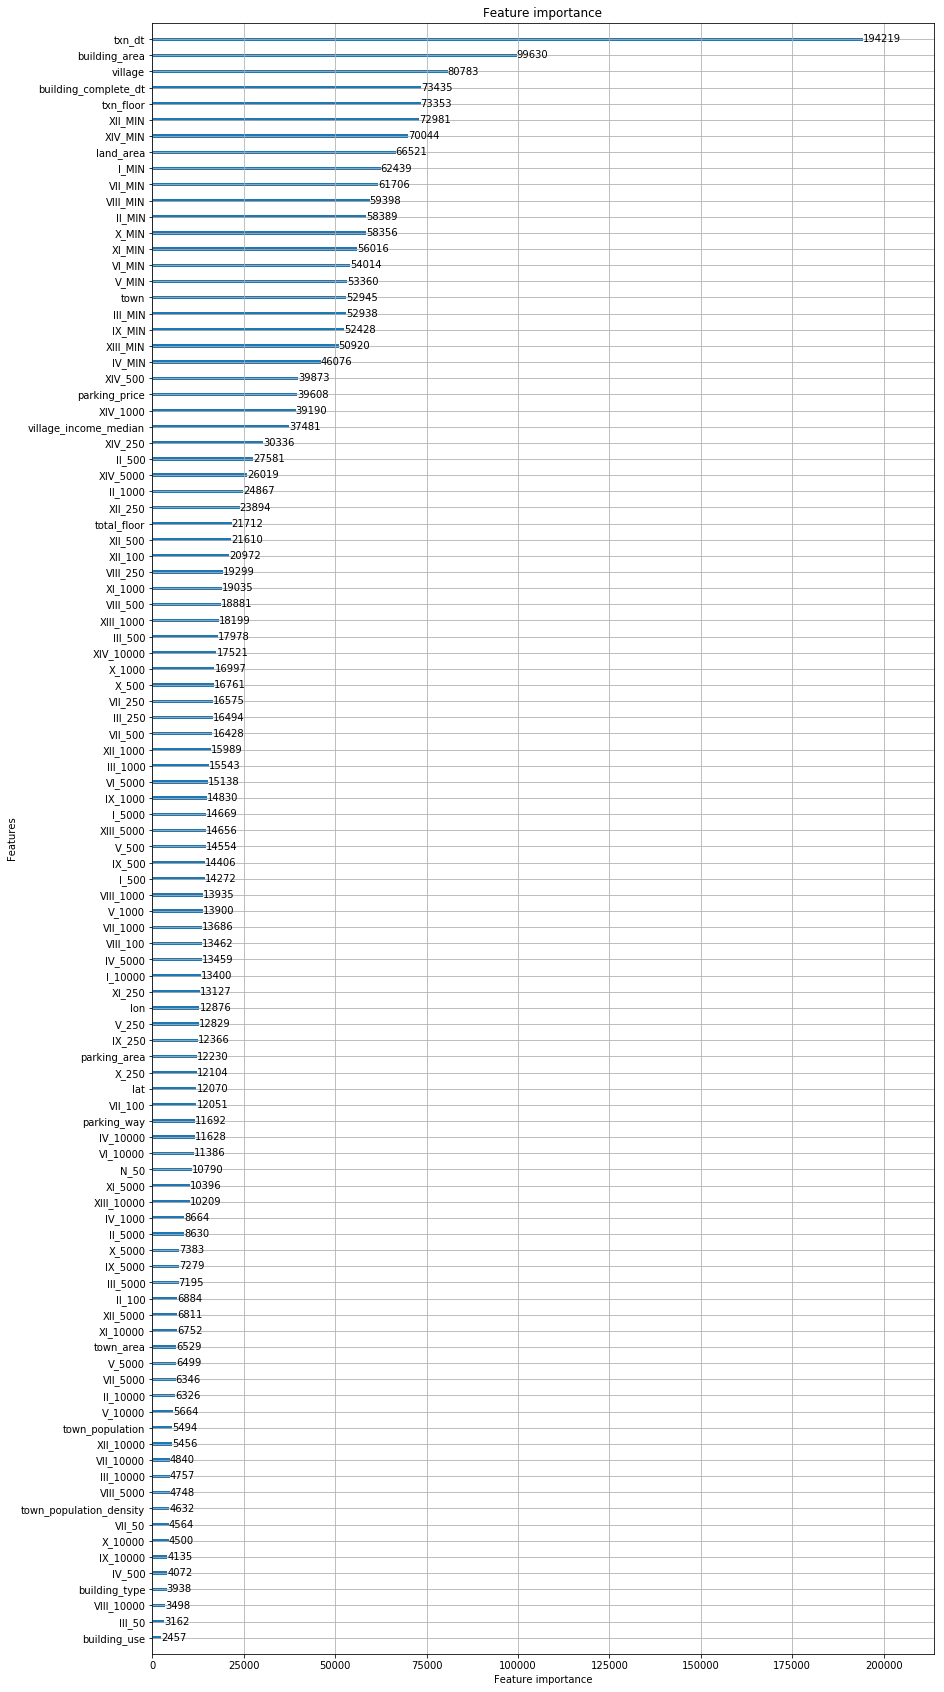

In [17]:
lgb.plot_importance(model, figsize=(14, 30), max_num_features=100)

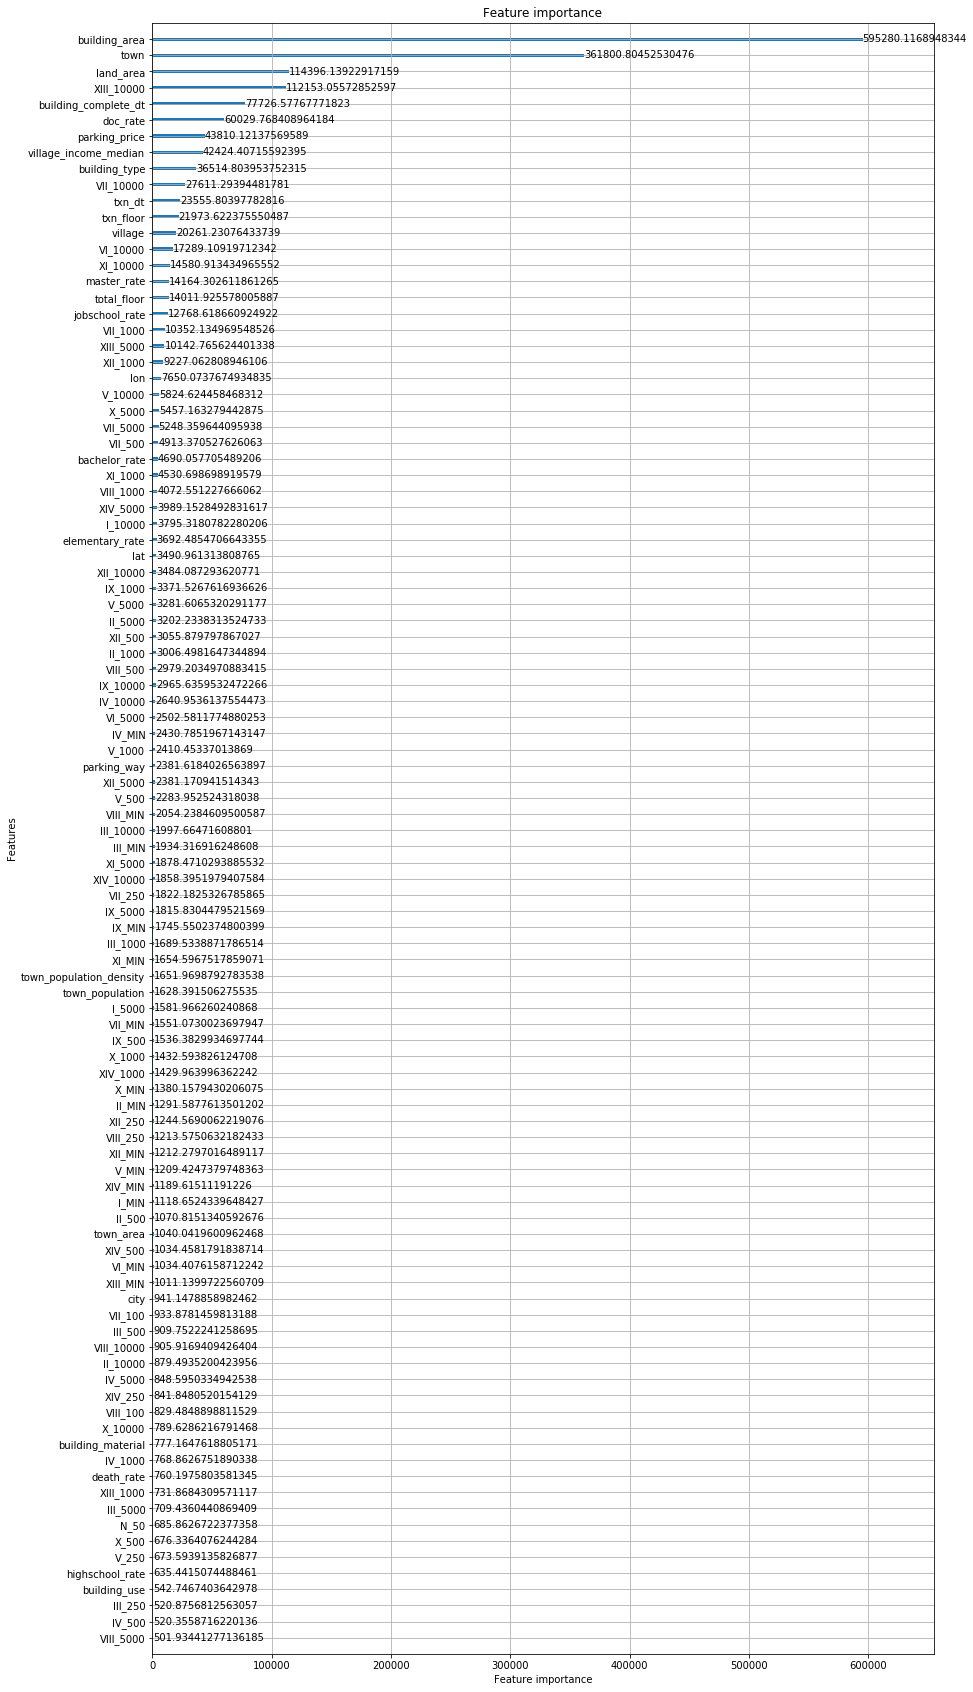

In [18]:
lgb.plot_importance(model, figsize=(14, 30), max_num_features=100, importance_type='gain')